<a href="https://colab.research.google.com/github/tudor108/human-emotion-detection/blob/main/cod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy pandas matplotlib seaborn tensorflow keras opencv-python scikit-learn


In [3]:
# Instalează biblioteca Kaggle
!pip install kaggle

# Creează folderul pentru API și mută fișierul kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Setează permisiuni pentru fișier (necesar pentru securitate)
!chmod 600 ~/.kaggle/kaggle.json

# Descarcă dataset-ul FER-2013
!kaggle datasets download -d msambare/fer2013

# Dezarhivează fișierul descărcat
!unzip fer2013.zip


Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_6552402

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


In [5]:
!unzip -q fer2013.zip


replace test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
!unzip -l fer2013.zip


Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
     1243  2020-07-19 12:26   train/happy/Training_35858702.jpg
     1646  2020-07-19 12:26   train/happy/Training_35875866.jpg
     1341  2020-07-19 12:26   train/happy/Training_35877462.jpg
     1474  2020-07-19 12:26   train/happy/Training_35938791.jpg
     1584  2020-07-19 12:26   train/happy/Training_3599060.jpg
     1683  2020-07-19 12:26   train/happy/Training_36016494.jpg
     1595  2020-07-19 12:26   train/happy/Training_36038825.jpg
     1371  2020-07-19 12:26   train/happy/Training_36044445.jpg
     1659  2020-07-19 12:26   train/happy/Training_36047336.jpg
     1330  2020-07-19 12:26   train/happy/Training_36063229.jpg
     1493  2020-07-19 12:26   train/happy/Training_36078105.jpg
     1665  2020-07-19 12:26   train/happy/Training_3610534.jpg
     1752  2020-07-19 12:26   train/happy/Training_36111460.jpg
     1749  2020-07-19 12:26   train/happy/Training_36112114.jpg
     1488  2020-07-19 12:26   train/

In [7]:
!unzip -l fer2013.zip


Datele de ieșire de afișat au fost trunchiate la ultimele 5000 linii.
     1706  2020-07-19 12:26   train/sad/Training_65275626.jpg
     1571  2020-07-19 12:26   train/sad/Training_6529266.jpg
     1499  2020-07-19 12:26   train/sad/Training_65329617.jpg
     1654  2020-07-19 12:26   train/sad/Training_65338712.jpg
     1650  2020-07-19 12:26   train/sad/Training_65338797.jpg
     1675  2020-07-19 12:26   train/sad/Training_65387162.jpg
     1644  2020-07-19 12:26   train/sad/Training_65404494.jpg
     1642  2020-07-19 12:26   train/sad/Training_65426218.jpg
     1574  2020-07-19 12:26   train/sad/Training_65430136.jpg
     1671  2020-07-19 12:26   train/sad/Training_65437377.jpg
     1321  2020-07-19 12:26   train/sad/Training_6545735.jpg
     1553  2020-07-19 12:26   train/sad/Training_65463385.jpg
     1506  2020-07-19 12:26   train/sad/Training_65473985.jpg
     1532  2020-07-19 12:26   train/sad/Training_65502829.jpg
     1760  2020-07-19 12:26   train/sad/Training_65505359.jpg
  

In [8]:
!ls train


angry  disgust	fear  happy  neutral  sad  surprise


In [9]:
import os
import cv2
import numpy as np

# Dimensiunea imaginii
IMG_SIZE = 48

# Listează emoțiile
emotions = os.listdir('train')

# Inițializează listele pentru imagini și etichete
X = []
y = []

# Citește imaginile din fiecare folder de emoție
for emotion in emotions:
    emotion_path = os.path.join('train', emotion)
    for img_name in os.listdir(emotion_path):
        # Citește imaginea
        img = cv2.imread(os.path.join(emotion_path, img_name), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Redimensionăm imaginea
        X.append(img)
        y.append(emotion)

# Convertim listele într-un array numpy
X = np.array(X)
y = np.array(y)

# Normalizăm imaginile
X = X / 255.0  # Valori între 0 și 1

# Afișează dimensiunea finală a setului de date
print(f"Dimensiunea setului de date: {X.shape}, Etichetele: {y.shape}")


Dimensiunea setului de date: (28709, 48, 48), Etichetele: (28709,)


In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convertim etichetele la valori numerice
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Aplicăm One-Hot Encoding
y = to_categorical(y, num_classes=len(emotions))

# Afișează primele etichete
print(y[:5])


[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]


In [27]:
from sklearn.model_selection import train_test_split

# Împărțim setul de date în 80% antrenament și 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afișează dimensiunile seturilor
print(f"Set de antrenament: {X_train.shape}, Set de test: {X_test.shape}")


Set de antrenament: (22967, 48, 48), Set de test: (5742, 48, 48)


In [12]:
from tensorflow.keras import layers, models

# Construirea modelului CNN
model = models.Sequential()

# Primul strat convoluțional + MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Al doilea strat convoluțional + MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Al treilea strat convoluțional + MaxPooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Strat de flattening
model.add(layers.Flatten())

# Strat dens
model.add(layers.Dense(128, activation='relu'))

# Strat de ieșire (categorical)
model.add(layers.Dense(len(emotions), activation='softmax'))

# Compilăm modelul
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afișează suma modelului
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Antrenăm modelul
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.2734 - loss: 1.7735 - val_accuracy: 0.4213 - val_loss: 1.5306
Epoch 2/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4345 - loss: 1.4750 - val_accuracy: 0.4688 - val_loss: 1.3885
Epoch 3/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4862 - loss: 1.3474 - val_accuracy: 0.4962 - val_loss: 1.3129
Epoch 4/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5292 - loss: 1.2364 - val_accuracy: 0.5164 - val_loss: 1.2804
Epoch 5/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5621 - loss: 1.1688 - val_accuracy: 0.5350 - val_loss: 1.2257
Epoch 6/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5848 - loss: 1.0965 - val_accuracy: 0.5388 - val_loss: 1.2186
Epoch 7/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6118 - loss: 1.0345 - val_accuracy: 0.5634 - val_loss: 1.1878
Epoch 8/10
359/359 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6437 - loss: 0.9627 - val_accuracy: 

In [14]:
# Evaluăm modelul
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Accuracy pe setul de test: {test_acc}")


180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5607 - loss: 1.2291
Accuracy pe setul de test: 0.5543364882469177


In [17]:
model.save('my_model.keras')


In [26]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [28]:
from tensorflow.keras.models import load_model

model = load_model('my_model.keras')


In [31]:
!ls /content/test/angry
!ls /content/test/disgust
!ls /content/test/fear
!ls /content/test/happy
!ls /content/test/neutral
!ls /content/test/sad
!ls /content/test/surprise


PrivateTest_10131363.jpg  PrivateTest_68166022.jpg  PublicTest_42826491.jpg
PrivateTest_10304478.jpg  PrivateTest_68333170.jpg  PublicTest_43169549.jpg
PrivateTest_1054527.jpg   PrivateTest_68356234.jpg  PublicTest_43316380.jpg
PrivateTest_10590091.jpg  PrivateTest_68462643.jpg  PublicTest_43332731.jpg
PrivateTest_1109992.jpg   PrivateTest_68557811.jpg  PublicTest_43360747.jpg
PrivateTest_11296953.jpg  PrivateTest_68625027.jpg  PublicTest_4379266.jpg
PrivateTest_12000629.jpg  PrivateTest_69389869.jpg  PublicTest_43895652.jpg
PrivateTest_12008383.jpg  PrivateTest_69615683.jpg  PublicTest_44022516.jpg
PrivateTest_12191716.jpg  PrivateTest_69720002.jpg  PublicTest_44184063.jpg
PrivateTest_1221822.jpg   PrivateTest_69727437.jpg  PublicTest_44227970.jpg
PrivateTest_12403575.jpg  PrivateTest_69790470.jpg  PublicTest_44679916.jpg
PrivateTest_12766285.jpg  PrivateTest_69886581.jpg  PublicTest_4496845.jpg
PrivateTest_12846357.jpg  PrivateTest_70053829.jpg  PublicTest_45792830.jpg
PrivateTest_12

In [32]:
!ls /content/test/happy/*.jpg


/content/test/happy/PrivateTest_10077120.jpg  /content/test/happy/PublicTest_11060787.jpg
/content/test/happy/PrivateTest_10470092.jpg  /content/test/happy/PublicTest_11107518.jpg
/content/test/happy/PrivateTest_10513598.jpg  /content/test/happy/PublicTest_11211241.jpg
/content/test/happy/PrivateTest_10516065.jpg  /content/test/happy/PublicTest_11394394.jpg
/content/test/happy/PrivateTest_10613684.jpg  /content/test/happy/PublicTest_11400293.jpg
/content/test/happy/PrivateTest_10736786.jpg  /content/test/happy/PublicTest_11480715.jpg
/content/test/happy/PrivateTest_11070306.jpg  /content/test/happy/PublicTest_11520713.jpg
/content/test/happy/PrivateTest_11155116.jpg  /content/test/happy/PublicTest_11555220.jpg
/content/test/happy/PrivateTest_11281040.jpg  /content/test/happy/PublicTest_11564784.jpg
/content/test/happy/PrivateTest_11288161.jpg  /content/test/happy/PublicTest_12083982.jpg
/content/test/happy/PrivateTest_1140198.jpg   /content/test/happy/PublicTest_12225602.jpg
/content/t

In [35]:
img_path = '/content/test/happy/PublicTest_24742457.jpg'


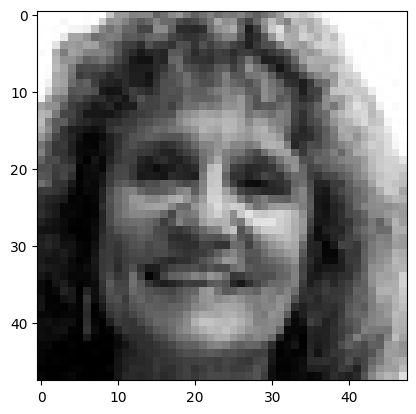

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Emoția prezisă este: happy


In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


model = load_model('my_model.keras')

# Calea către imaginea de test
img_path = '/content/test/happy/PublicTest_24742457.jpg'

# Încărcăm și preprocesăm imaginea
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Eroare la încărcarea imaginii. Verifică calea fișierului.")
else:
    img = cv2.resize(img, (48, 48))  # Redimensionăm imaginea la dimensiunea de 48x48
    img = img / 255.0  # Normalizăm imaginea
    img = np.reshape(img, (1, 48, 48, 1))  # Adăugăm dimensiunea necesară pentru model


    plt.imshow(img[0], cmap='gray')
    plt.show()

    # Face predicția
    pred = model.predict(img)

    # Decodează rezultatul predicției
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    emotion = emotions[np.argmax(pred)]
    print(f"Emoția prezisă este: {emotion}")


In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Accuracy pe setul de test: {test_acc}")


180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5607 - loss: 1.2291
Accuracy pe setul de test: 0.5543364882469177


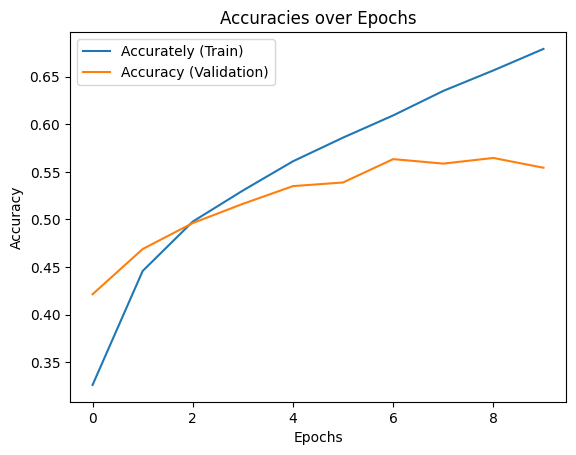

In [40]:
# Vizualizează evoluția performanței în timpul antrenamentului
plt.plot(history.history['accuracy'], label='Accurately (Train)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.title('Accuracies over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
